In [10]:
from functools import wraps #还原func help
def memo(func):
    cache = {}
    @wraps(func)
    def _wrap(*args, **kwargs):
        # print('\tHi, I am function:{}'.format(func.__name__))
        str_key = str(args) + str(kwargs)
        if str_key not in cache:
            result = func(*args, **kwargs)
            cache[str_key] = result
        return cache[str_key]
    return _wrap

In [14]:
@memo
def get_edit_distance(string1, string2):
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    return min(
    [
        get_edit_distance(string1[:-1], string2) + 1,
        get_edit_distance(string2[:-1], string1) + 1,
        get_edit_distance(string1[:-1], string2[:-1]) + (0 if string1[-1] == string2[-1] else 2)
    ])

In [15]:
import time
start = time.time()
get_edit_distance('studfadsfsay', 'learfadsfasfdn')
end = time.time()
end - start

0.001993417739868164

In [16]:
get_edit_distance('biejing','beijing')

2

In [17]:
get_edit_distance('biejing','biejie')

3

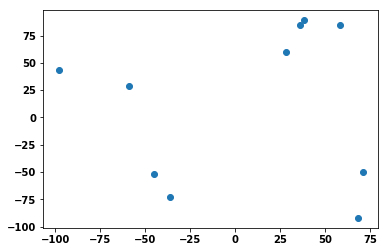

In [186]:
import random
import matplotlib.pyplot as plt
latitudes = [random.randint(-100, 100) for _ in range(10)]
longitude = [random.randint(-100, 100) for _ in range(10)]
plt.scatter(latitudes, longitude)
plt.show()

In [187]:
car_number = 4
dot_num = len(latitudes)

In [188]:
dot = list(zip(latitudes,longitude))
print(dot)

[(58, 85), (-45, -52), (38, 89), (28, 60), (-36, -73), (71, -50), (-98, 43), (68, -92), (36, 85), (-59, 29)]


In [189]:
dot_array = [list(x) for x in dot]
dot_array

[[58, 85],
 [-45, -52],
 [38, 89],
 [28, 60],
 [-36, -73],
 [71, -50],
 [-98, 43],
 [68, -92],
 [36, 85],
 [-59, 29]]

In [190]:
import numpy as np
dot_array= np.array(dot_array)
dot_array

array([[ 58,  85],
       [-45, -52],
       [ 38,  89],
       [ 28,  60],
       [-36, -73],
       [ 71, -50],
       [-98,  43],
       [ 68, -92],
       [ 36,  85],
       [-59,  29]])

In [191]:
dist = np.zeros((dot_num, dot_num))
dist

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [192]:
import math
for i in range(dot_num):
    for j in range(dot_num):
        dist[i,j] = math.sqrt(np.sum((dot_array[i, :] - dot_array[j, :]) ** 2))
dist

array([[  0.        , 171.40011669,  20.39607805,  39.05124838,
        183.84776311, 135.62448157, 161.55494421, 177.28226082,
         22.        , 129.71121771],
       [171.40011669,   0.        , 163.6154027 , 133.68993979,
         22.84731932, 116.0172401 , 108.78419003, 119.87076374,
        159.15401346,  82.20097323],
       [ 20.39607805, 163.6154027 ,   0.        ,  30.6757233 ,
        178.10109489, 142.86357128, 143.56879884, 183.46934349,
          4.47213595, 114.05700329],
       [ 39.05124838, 133.68993979,  30.6757233 ,   0.        ,
        147.59742545, 118.1058847 , 127.14165328, 157.17506164,
         26.2488095 ,  92.35799911],
       [183.84776311,  22.84731932, 178.10109489, 147.59742545,
          0.        , 109.44404963, 131.52946438, 105.72133181,
        173.63179432, 104.56098699],
       [135.62448157, 116.0172401 , 142.86357128, 118.1058847 ,
        109.44404963,   0.        , 192.89893727,  42.10700654,
        139.46325681, 152.12166184],
       [16

In [193]:
path_dot = np.ones((2 ** (dot_num + 1), dot_num))
dp = np.ones((2 ** (dot_num + 1), dot_num)) * -1

In [194]:
def TSP(s, init, num):
    if dp[s][init] != -1:
        return dp[s][init]
    if s == (1 << (dot_num)):
        return dist[0][init]
    sumpath = 1000000000
    for i in range(dot_num):
        if s & (1 << i):
            m = TSP(s & (~(1 << i)), i, num + 1) + dist[i][init]
            if m < sumpath:
                sumpath = m
                path_dot[s][init] = i
    dp[s][init] = sumpath
    return dp[s][init]

In [195]:
init_point = 0
s = 0
for i in range(1, dot_num + 1):
    s = s | (1 << i)
start = time.clock()
distance = TSP(s, init_point, 0)
end = time.clock()
s = 0b11111111110
init = 0
num = 0
print(distance)
ans_road = []
while True:
    print(path_dot[s][init])
    ans_road.append(path_dot[s][init])
    init = int(path_dot[s][init])
    s = s & (~(1 << init))
    num += 1
    if num > 9:
        break
ans_road

599.9960505941038
2.0
8.0
3.0
9.0
6.0
1.0
4.0
7.0
5.0
1.0


[2.0, 8.0, 3.0, 9.0, 6.0, 1.0, 4.0, 7.0, 5.0, 1.0]

In [196]:
# ans_road_int = map(int,ans_road)
dot_road = [dot_array[int(i)] for i in ans_road]

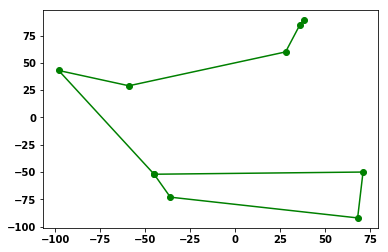

In [197]:
x1 = []
x2 = []
for x in dot_road:
    x1.append(x[0])
    x2.append(x[1])
plt.plot(x1, x2, 'go-')  #带有圆圈标记的绿线
plt.show()